# Precio de las Casas en Boston

Trabajaremos con los dataset que vienen en la librería de Scikit-Learn. Entrenaremos modelos de Machine Learning: Regresión lineal simple y multilineal, para predecir el precio de las casas.

In [1]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, linear_model   #aqui se encuentra el dataset y los modelos lineales
from sklearn.metrics import mean_squared_error #para calcular el error cuadrático medio 
from sklearn.model_selection import train_test_split #para separar datos de entrenamiento y de prueba
from sklearn.preprocessing import PolynomialFeatures #para definir el grado del polinomio

## 1. EDA y PREPROCESAMIENTO
- 1.1 Carga y primer vistazo de los datos
- 1.2 Descripción estadística
- 1.3 Visualización de los datos y eliminación de outliers
- 1.4 Análisis Multivariado (Correlaciones y gráficas de dispersión)

## 1.1 Carga y primer vistazo de los datos

In [2]:
#Importamos los datos de la librería Scikit-Learn
boston = datasets.load_boston()

#Buscamos cuales son las llaves del dataset para saber donde consultar la información
print('Llaves del dataset: ', boston.keys())

Llaves del dataset:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
#Descripción del dataset (conocemos el número y la descripción de las columnas, numero de registros, si hay valores nulos, etc. )
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print('Cantidad de datos: ', boston.data.shape)
print('Columnas de datos: ', boston.feature_names)
print('Registros del precios de las casas: ', boston.target.shape)

Cantidad de datos:  (506, 13)
Columnas de datos:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Precios de las casas:  (506,)


In [3]:
#Para una mejor manejo y visualización, lo pasamos a un dataframe
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Información obtenida:
- El dataset se compone de 13 columnas con 506 registros cada una sin valores perdidos por lo que no tendremos que hacer mucho preprocesamiento.
- Tenemos la descripción de cada columna.
- Hay una columna que aparece en DESC pero no está en la data y es la columna MEDV

## 1.2 Descripción estadística

In [35]:
#Tenemos que data-type tiene cada columna y si presenta valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
# Estadísticos de cada columna
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Información obtenida:
- Obtenemos los Dtype de cada columna y corroboramos que no presenta valores nulos.
- Todos los datos son numéricos continuos, salvo la columna Chas, esa es categórica binaria.
- Obtenemos los principales estadísticos de todas las columnas.

## 1.3 Visualización de los datos

Casi todo los datos son numéricos continuos, por lo que ocuparemos histogramas y gráficas de caja y brazo para visualizarlos.

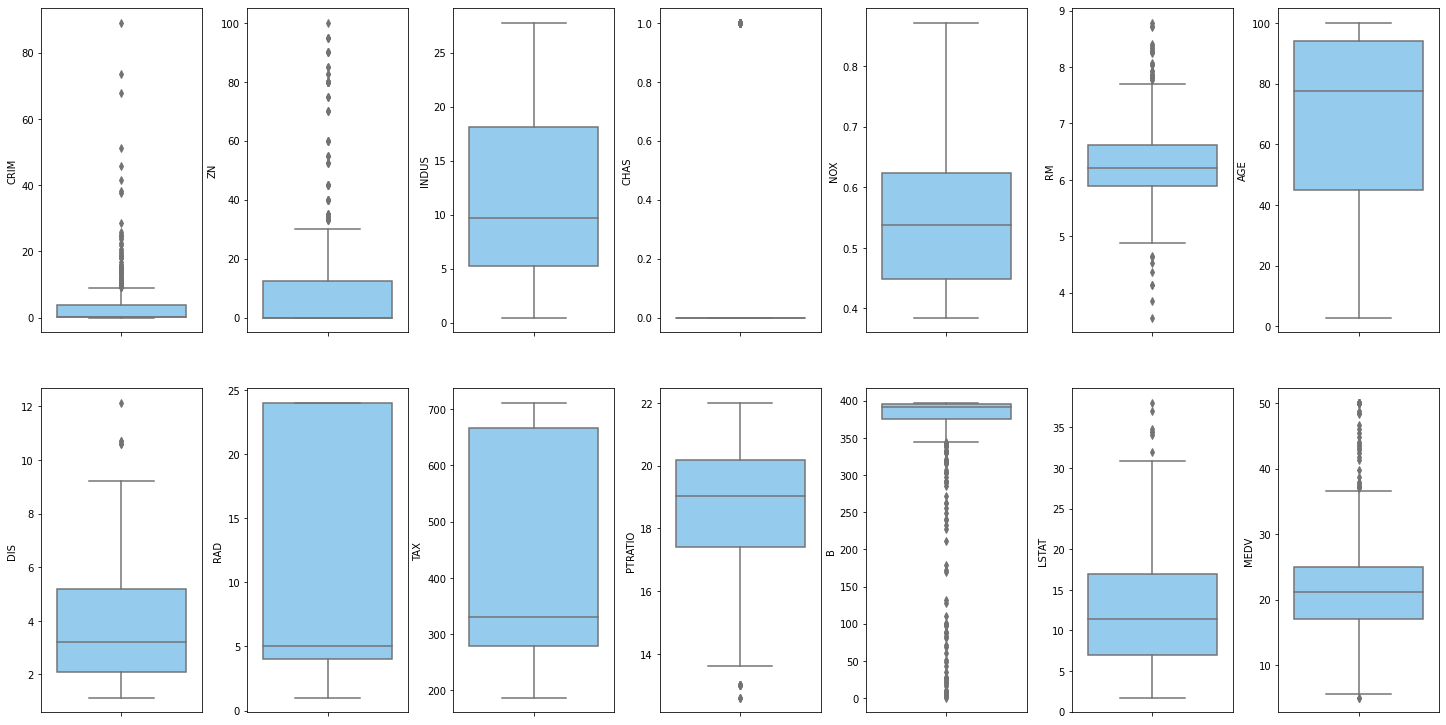

In [29]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color = 'lightskyblue')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

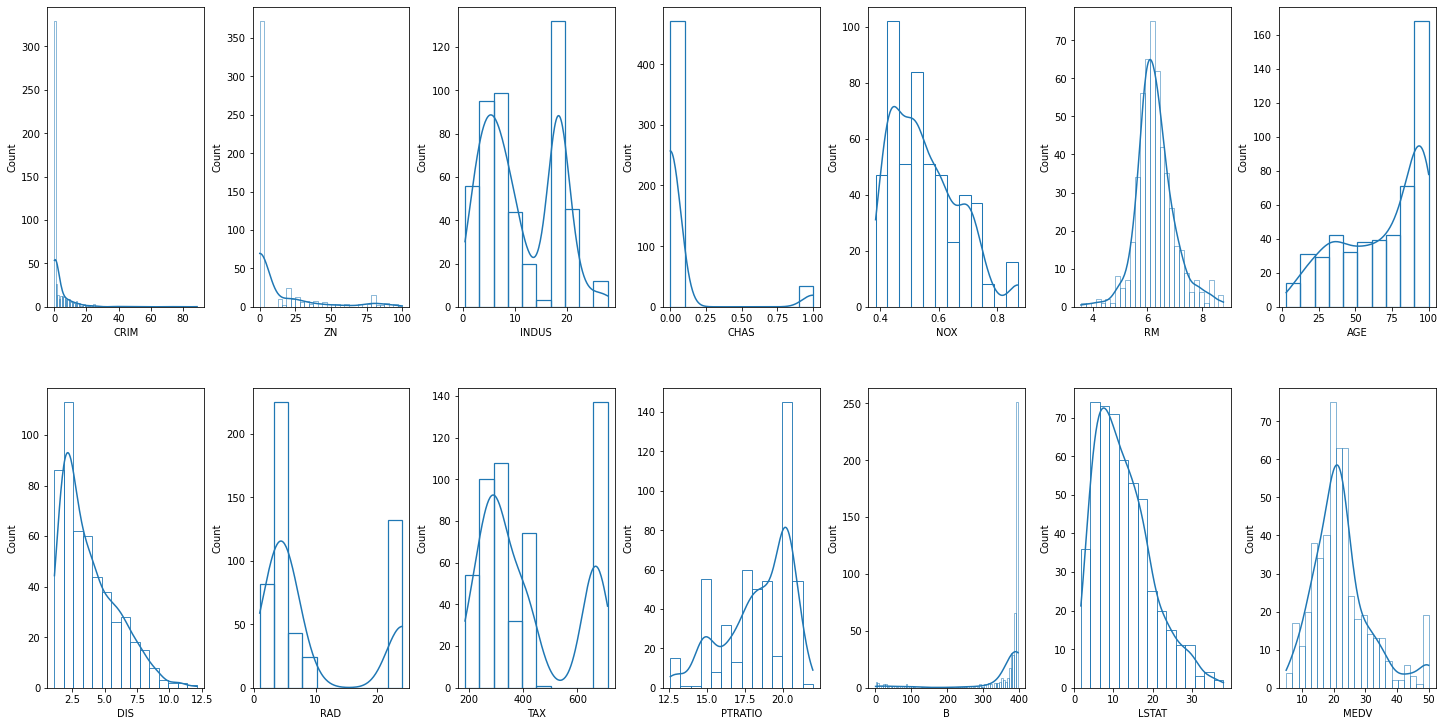

In [30]:
#Histogramas que muestra las distribuciones de los datos
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(x=k, data=df, kde = True, ax=axs[index], fill=False)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- De las gráficas de caja y brazos visualizamos que varias categorías presentan outliers (valores extremos), en particular, el precio de las casas MEDV, el cual realizaremos un pequeño preprocesamiento donde nos quedaremos hasta el percentil 95.
- Visualizamos que algunas de las distribucionesson normales, la más evidente es la del promedio de las habitaciones (RM) y el precio de las casa (MEDV). Hay otras distribuciones normales muy sesgadas como la tasa de crimen CRIM, la proporcion de terreno ZN y la proporcion de gente negra B. Otras presentan menor sesgo  como la distancia a centros de trabajo DIS y la proporcion de gente de clase baja LSTAT.

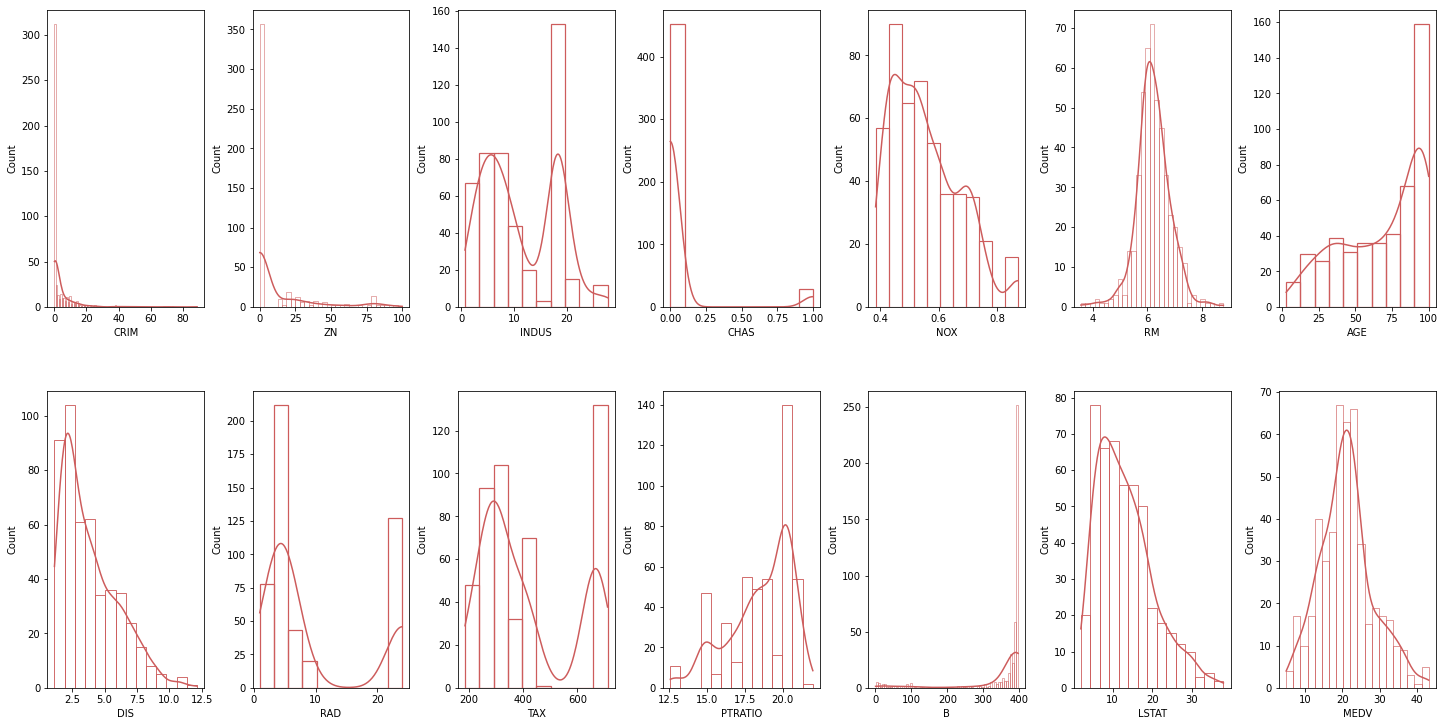

In [4]:
#Creamos un nuevo dataframe que solo incluya  los precios menores al percentil 95 
df_procesado = df.loc[df['MEDV'] <= df['MEDV'].quantile(0.95)]

#Vemos nuevamente las distribuciones
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_procesado.items():
    sns.histplot(x=k, data=df_procesado, kde = True, ax=axs[index], fill=False, color = 'indianred')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- La gráfica MEDV presenta una distribución normal más centrada, lo cual será beneficioso para el modelo ya que la regresión lineal requiere que los datos tengan una distribución normal para su mejor entrenamiento.

## 1.4 Análisis Multivariado (Correlaciones)

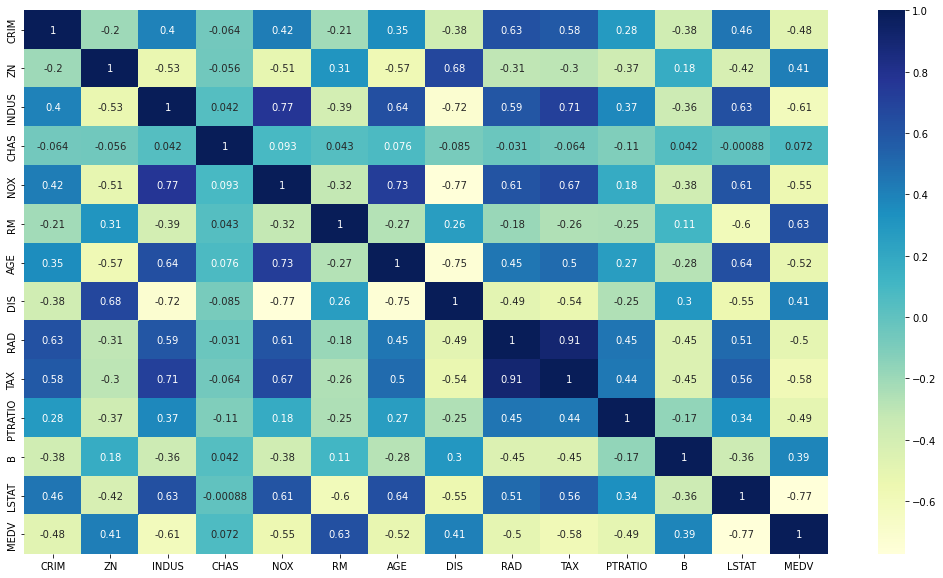

In [35]:
# Matriz de correlacion
fig = plt.figure(figsize = (18,10))
sns.heatmap(df_procesado.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Información obtenida:
- Hay una alta correlación positiva entre el precio y el número de habitaciones RM (0.63).
- Hay una alta correlación negativa entre el precio y el porcentaje de personas con estatus bajo LSTAT (-0.77).
- Hay una correlación negativa entre el precio y la proporcion de tiendas no minoristas o zonas industriales INDUS (-0.61).
- Del resto de categorías, consideramos que su correlación con el precio no es tan relevante.


Realizaremos gráficas de dispersión para visualizar estas correlaciones.

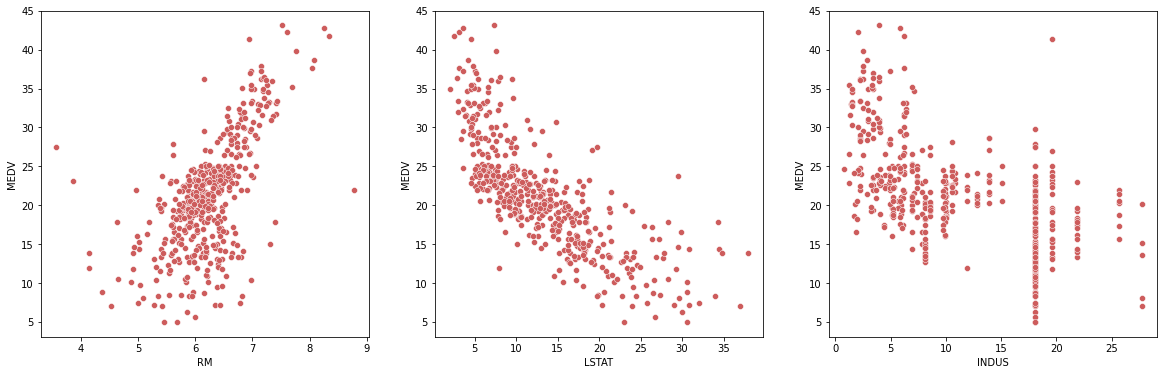

In [144]:
#Gráficas de dispersión
df_disp1 = df_procesado[['RM','LSTAT','INDUS','MEDV']]
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in df_disp1.items():
    if index != 3:
        sns.scatterplot(x=k, y ='MEDV', data=df_disp, color = 'indianred', ax=axs[index])
        index += 1

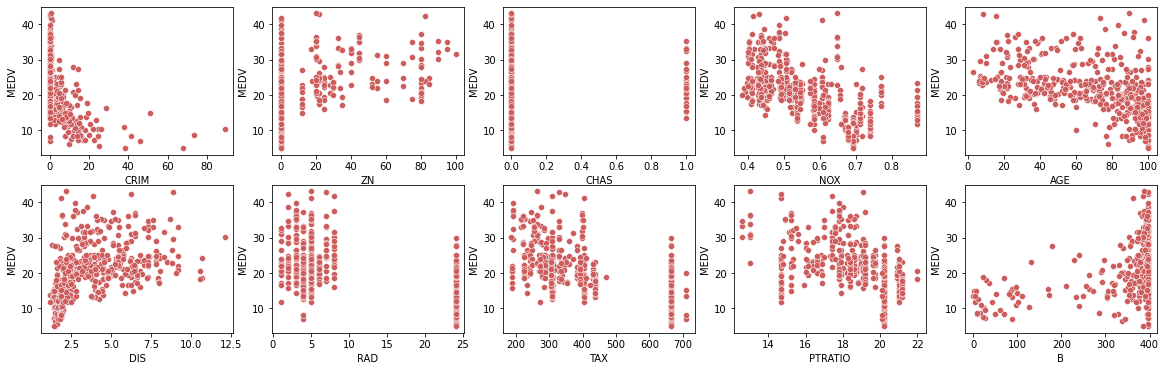

In [146]:
#Observemos la dispersión del resto de las categorías con MEDV
df_disp2 = df_procesado[['CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','MEDV']]
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in df_disp2.items():
    if index != 10:
        sns.scatterplot(x=k, y ='MEDV', data=df_disp2, color = 'indianred', ax=axs[index])
        index += 1

Información obtenida:
- Al realizar las gráficas de dispersión se pueden visualizar que puede haber tendencias lineales, sobre todo con el número de habitaciones RM y la proporción de gente de clase baje LSTAT por lo que podemos realizar una primera aproximación con una regresión lineal simple o polinomial.

# 2. MODELOS DE MACHINE LEARNING

Pondremos a pruebas diferentes modelos de machine learning para la predicción del precio MEDV:
- 2.1 Regresion Lineal Simple
- 2.2 Regresión Lineal Multiple
- 2.3 Regresión Polinomial
- 2.4 Vectores de Soporte
- 2.5 Bosques aleatorios

## 2.1 Regresión Lineal Simple

Este modelo intenta ajustar una ecuación lineal simple de la forma:
$$Y = b + mX$$

En base al EDA y al preprocesamiento realizado, hemos adaptado los datos para el correcto entrenamiento de un algoritmo de regresión lineal simple.
Donde las variables dependientes e independientes están altamente correlacionadas, además de que sus datos se distribuyen de forma normal y no presentan demasiados valores extremos que dificulten el aprendizaje del modelo. Para medir el rendimiento del modelo utilizaremos la métrica $R^2$ dado por:
$$ R^2 = 1 - \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$
Donde $\hat{y}_i$ es el i-ésimo valor predicho y $\bar{y}$ el promedio de los datos verdaderos. EL valor de $R^2$ oscila entre 0 y 1, donde, mientras más cercano esté de 1, mayor precisión tendrá el modelo. 

Y para medir el error utilizaremos la raíz del error cuadrático medio (RMSE) dado por:
$$ RMSE = \sqrt{ \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} }$$
Donde, mientras más cercano esté del 0, menor error habrá.

### MEDV vs RM 

In [116]:
# Separamos los datos de entrenamiento y prueba, tomando un 20% de los datos para la prueba
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1), 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_simple = lr.coef_
b1_simple = lr.intercept_
R1_simple = lr.score(X_train1,Y_train1)  # score R^2
Y_pred1_simple = lr.predict(X_test1)  # m1*X + b1
RMSE1_simple = np.sqrt(mean_squared_error(Y_test1, Y_pred1_simple))

In [117]:
#Resultados del modelo
print(f"La pendiente es: {m1_simple},  y la intersección es: {b1_simple}")
print()
print(f"La precisión del modelo R^2: {R1_simple}")
print()
print(f"El error RMSE: {RMSE1_simple}")

La pendiente es: [7.56121444],  y la intersección es: -25.751386214379426

La precisión del modelo R^2: 0.41803645909024056

El error RMSE: 5.549315813440965


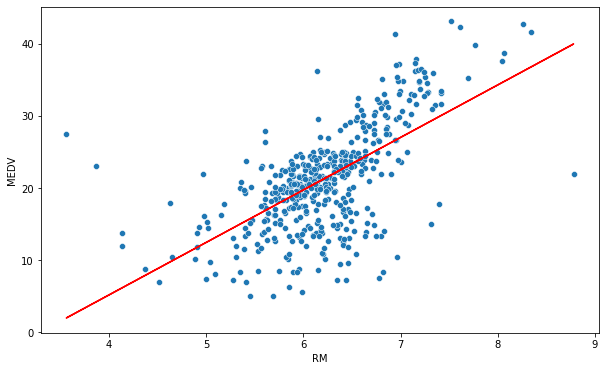

In [71]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1), m1_simple * df_procesado['RM'].values + b1_simple, color = 'r')
plt.show()

### MEDV vs LSTAT

In [118]:
# Modelo sin preprocesamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df['LSTAT'].values.reshape(-1,1), 
                                                        df['MEDV'].values,
                                                        test_size = 0.20)
#Entreno el modelo
lr.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_simple = lr.coef_
b2_simple = lr.intercept_
R2_simple = lr.score(X_train2,Y_train2)  # score R^2
Y_pred2_simple = lr.predict(X_test2)  # m2*X + b2
RMSE2_simple = np.sqrt(mean_squared_error(Y_test2, Y_pred2_simple))

In [119]:
#Resultados del modelo
print(f"La pendiente es: {m2_simple},  y la intersección es: {b2_simple}")
print()
print(f"La precisión del modelo R^2: {R2_simple}")
print()
print(f"El error RMSE: {RMSE2_simple}")

La pendiente es: [-0.96361763],  y la intersección es: 34.56769868120486

La precisión del modelo R^2: 0.5517134663156464

El error RMSE: 6.460381920426926


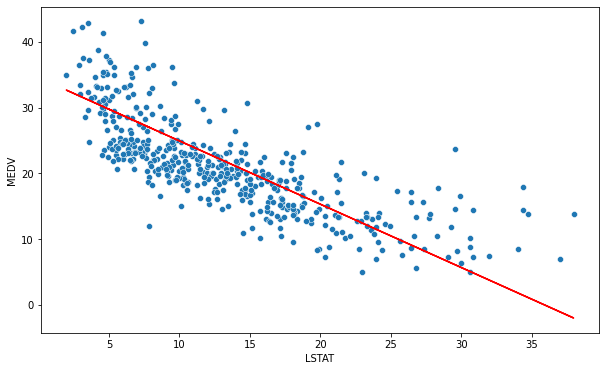

In [120]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(df_procesado['LSTAT'].values.reshape(-1,1), m2_simple * df_procesado['LSTAT'].values + b2_simple, color = 'r')
plt.show()

Se obtuvo la siguiente información:
- Comparando el rendimiento $R^2$ y el error RMSE de ambos entrenamientos, tenemos que la mejor variable para predecir los precios MEDV es la variable LSTAT. Pero el valor de $R^2$ sigue siendo un valor bajo para considerarlo un buen modelo para estos datos, por lo que la prueba MEDV vs LSTAT se pondrá a prueba con los siguientes modelos en busca de la mejor predicción.

## 2.2 Regresión Lineal Multiple

Este modelo intenta ajustar una ecuación de la forma:
$$ Y = b_0 + b_1 X_1 + b_2 X_2 + \cdots $$
Donde X_i es la i-ésima varable independiente. Para este modelo, las variables independientes deben estar altamente correlacionadas con la variable dependiente, pero no  deben estar correlacionadas entre sí; es decir, que presenten colinealidad. Además, hay que tener cuidado ya que la dificultad del modelo aumenta conforme aumenta el número de variables independientes.

En la matriz de correlaciones, señalamos varias las columnas con mayor correlación con MEDV como: "RM", "LSTAT" e "INDUS". Vemos además que entre "RM" y "LSTAT" hay una correlación  del -0.6 y "LSTAT" e "INDUS" del 0.63. Entre   "RM" y "INDUS" presentan una correlación baja del -0.39.

En base a esto realizaremos dos pruebas, una donde probamos las 3 categorías y otra donde solo probamos con RM y INDUS que presentan una correlación baja. Se utilizaran los mismos criterios de $R^2$ y RMSE para medir el rendimiento y error del modelo.

### MEDV vs RM, LSTAT y INDUS

In [121]:
# Entrenando el modelo con "RM", "LSTAT" y "PTRIATO"
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_mul = lr_multiple.coef_  #seran 3 coeficientes
b1_mul = lr_multiple.intercept_
R1_mul = lr_multiple.score(X_train1,Y_train1)  # score R^2
Y_pred1_mul = lr_multiple.predict(X_test1)  # m2*X + b2
RMSE1_mul = np.sqrt(mean_squared_error(Y_test1, Y_pred1_mul))

In [171]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_mul},  y la intersección es: {b1_mul}")
print()
print(f"La precisión del modelo R^2: {R1_mul}")
print()
print(f"El error RMSE: {RMSE1_mul}")

Los coeficientes son: [ 3.01515243 -0.49341396 -0.22222753],  y la intersección es: 11.328437422103711

La precisión del modelo R^2: 0.6712395294371658

El error RMSE: 4.006338475229145


### MEDV vs RM y INDUS

In [141]:
# Entrenando el modelo con "RM", "LSTAT" y "PTRIATO"
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado[['RM','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Entreno el modelo
lr_multiple.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_mul = lr_multiple.coef_  #seran 2 coeficientes
b2_mul = lr_multiple.intercept_
R2_mul = lr_multiple.score(X_train2,Y_train2)  # score R^2
Y_pred2_mul = lr_multiple.predict(X_test2)  # m2*X + b2
RMSE2_mul = np.sqrt(mean_squared_error(Y_test2, Y_pred2_mul))

In [172]:
#Resultados del modelo
print(f"Los coeficientes son: {m2_mul},  y la intersección es: {b2_mul}")
print()
print(f"La precisión del modelo R^2: {R2_mul}")
print()
print(f"El error RMSE: {RMSE2_mul}")

Los coeficientes son: [ 5.84014398 -0.43994646],  y la intersección es: -9.946035560734373

La precisión del modelo R^2: 0.5826239110965397

El error RMSE: 5.098349333608118


Se obtuvo la siguiente información:
- Se obtuvo una mejor predicción con las tres categorias juntas que combinando solamente 2, con una $R^2=0.67$, y un $RMSE = 4.006$, por lo que es el mejor resultado que tenemos hasta el momento. Sin embargo sigue siendo bajo para considerarlo un buen modelo por lo que lo pondremos a prueba con el resto de los modelos.


## 2.3 Regresión Polinomial

Este modelo intenta ajustar una ecuación:
$$ Y = b_0 + b_1X_1 + b_2X_1^2 + ... + c_1X_2 + c_2X_2^2 +...$$
Hay que tener en cuenta que este modelo tiene una tendencia a sobreajustarse si el número del polinomio aumenta por lo que solo nos limitaremos a polinomios de grado 2. Además de que la complejidad de la fórmula aumenta conforme agregamos más variables independientes.

En la sección 1.4 visualizamos algunas gráficas de dispersión con la variable MEDV y dos categorías que podemos probar con este modelo son RM Y LSTAT. El primero debido a que podemos apreciar una curvatura en la parte inferior de los datos, mientras que del segundo apreciamos una curvatura en los extremos de lso datos.

### MEDV VS RM

In [155]:
#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
#se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Se transforma las caracteristicas existentes en características de mayor grado
X_train1_poli = poli_reg.fit_transform(X_train1) #distribuimos la variable ind. en X y X^2
X_test1_poli = poli_reg.fit_transform(X_test1)

pr.fit(X_train1_poli, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_pol = pr.coef_  #seran 2 coeficientes
b1_pol = pr.intercept_
R1_pol = pr.score(X_train1_poli,Y_train1)  # score R^2
Y_pred1_pol = pr.predict(X_test1_poli)  # c1*X +c2X^2 + b1
RMSE1_pol = np.sqrt(mean_squared_error(Y_test1, Y_pred1_pol))

In [173]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_pol},  y la intersección es: {b1_pol}")
print()
print(f"La precisión del modelo R^2: {R1_pol}")
print()
print(f"El error RMSE: {RMSE1_pol}")

Los coeficientes son: [  0.         -16.99996545   1.93673067],  y la intersección es: 51.263314951872346

La precisión del modelo R^2: 0.43433607277432373

El error RMSE: 5.384292584077877


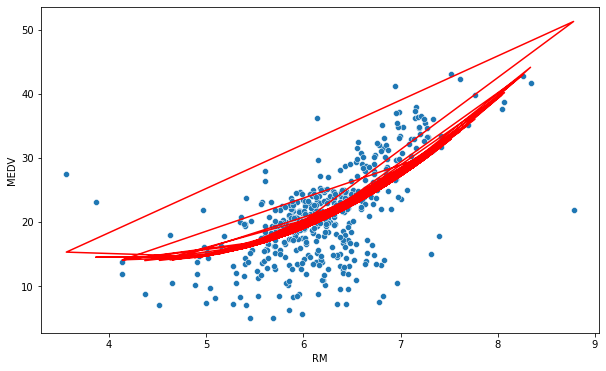

In [157]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1),
         m1_pol[2] * df_procesado['RM'].values**2 + m1_pol[1] * df_procesado['RM'].values + b1_pol, color = 'r')
plt.show()

### MEDV vs LSTAT

In [167]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Se transforma las caracteristicas existentes en características de mayor grado
X_train2_poli = poli_reg.fit_transform(X_train2) #distribuimos la variable ind. en X y X^2
X_test2_poli = poli_reg.fit_transform(X_test2)

pr.fit(X_train2_poli, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_pol = pr.coef_  #seran 2 coeficientes
b2_pol = pr.intercept_
R2_pol = pr.score(X_train2_poli,Y_train2)  # score R^2
Y_pred2_pol = pr.predict(X_test2_poli)  # c1*X +c2X^2 + b1
RMSE2_pol = np.sqrt(mean_squared_error(Y_test2, Y_pred2_pol))

In [174]:
#Resultados del modelo
print(f"Los coeficientes son: {m2_pol},  y la intersección es: {b2_pol}")
print()
print(f"La precisión del modelo R^2: {R2_pol}")
print()
print(f"El error RMSE: {RMSE2_pol}")

Los coeficientes son: [ 0.         -1.65417952  0.02738453],  y la intersección es: 36.69459989876121

La precisión del modelo R^2: 0.6708263055027588

El error RMSE: 4.872707040879886


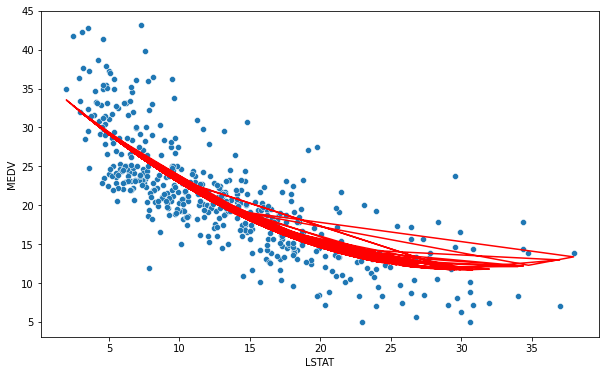

In [170]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(df_procesado['LSTAT'].values.reshape(-1,1),
         m2_pol[2] * df_procesado['LSTAT'].values**2 + m2_pol[1] * df_procesado['LSTAT'].values + b2_pol, color = 'r')
plt.show()

Se obtuvo la siguiente información:
- Obtenemos una mejor predicción con la variable LSTAT, con una $R^2=0.67$, y un $RMSE = 4.87$, muy similar a los resultados del algoritmo de regresión multiple de 3 categorías. Sin embargo este lo supera debido a que solo requiere de una variable para realizar la descripción por lo que consideramos que este modelo tiene el mejor rendimiento hasta ahora.

## Vectores de Soporte

In [175]:
print("hola")

hola
